In [1]:
import numpy as np
import os
import plotly.express as px

os.environ["KERAS_BACKEND"] = "torch" 

import keras
import torch

# Lendo Rede e Pegando Uma Camada

In [2]:
vgg = keras.applications.VGG16(
    weights="imagenet",
    name="vgg16",
)
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
convlayer = vgg.layers[1] # First conv layer
lws = convlayer.get_weights()[0]
print("Layer tensor shape: ", lws.shape)
lwsa = lws[...,0,:]
print("One slice shape: ", lwsa.shape)
print("First slice:\n ",lwsa[...,0])
Mcoefs = lwsa.reshape((9,64))
print("First column from coef matrix:\n", Mcoefs[:,0])

Layer tensor shape:  (3, 3, 3, 64)
One slice shape:  (3, 3, 64)
First slice:
  [[ 0.42947057  0.373467   -0.06136011]
 [ 0.27476987  0.03868078 -0.36722335]
 [-0.05746817 -0.26224968 -0.35009676]]
First column from coef matrix:
 [ 0.42947057  0.373467   -0.06136011  0.27476987  0.03868078 -0.36722335
 -0.05746817 -0.26224968 -0.35009676]


# Fazendo SVD

(9, 9)
(9,)
(64, 64)
(9, 4)
(4,)
(4, 64)


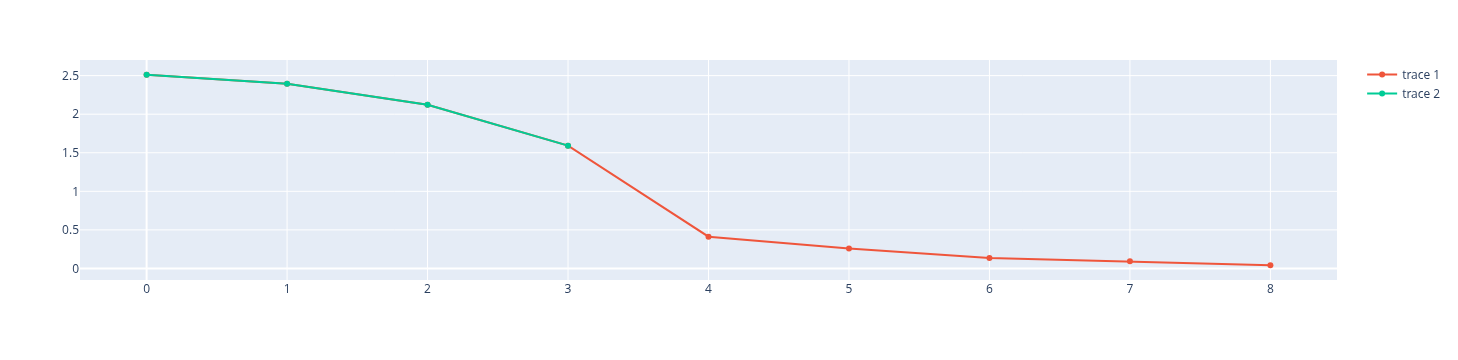

0.013691665
0.013691665


In [22]:
trunc = 4
fig = px.line()

U,S,Vh = np.linalg.svd(Mcoefs)
print(U.shape)
print(S.shape)
print(Vh.shape)
fig.add_scatter(y=S)

Ut = U[:,:trunc]
St = S[:trunc]
Vht = Vh[:trunc,:]
print(Ut.shape)
print(St.shape)
print(Vht.shape)
SSt = np.pad(np.diag(St),((0,0),(0,Vht.shape[0]-St.shape[0])))

fig.add_scatter(y=St)
fig.show()

print(np.sum((Ut@SSt@Vht - Mcoefs)**2) / np.sum((Mcoefs)**2))
Utb = Ut@SSt
print(np.sum((Utb@Vht - Mcoefs)**2) / np.sum((Mcoefs)**2))

# Criando Camada de Referência

In [23]:
xref = np.random.randn(1,10,10,1)
convlayerref = keras.layers.Conv2D(64, (3,3), kernel_initializer="glorot_uniform", 
                                   bias_initializer='zeros',activation=None)
convlayerref(xref) # Chamando uma vez para inicializar
clws = convlayerref.get_weights()[0]
print(clws.shape)
print(clws[...,0,0])
convlayerref.set_weights([lws[:,:,0:1,:], np.zeros(64)])
yref = convlayerref(xref)
print(yref.shape)

(3, 3, 1, 64)
[[-0.0824194   0.08325301 -0.05089929]
 [ 0.08827537  0.0372465  -0.0521313 ]
 [ 0.07356112 -0.03595823 -0.01297943]]
torch.Size([1, 8, 8, 64])


# Criando Cascata de Camadas Baseada na SVD

In [24]:
convlayer1 = keras.layers.Conv2D(trunc, (3,3), kernel_initializer="glorot_uniform", 
                                   bias_initializer='zeros',activation=None)
convlayer1(xref)
Utbr = Utb.reshape(3,3,1,trunc)
convlayer1.set_weights([Utbr,np.zeros(trunc)])
y = convlayer1(xref)
print(y.shape)

convlayer2 = keras.layers.Conv2D(64, (1,1), kernel_initializer="glorot_uniform", 
                                   bias_initializer='zeros',activation=None)
convlayer2(y)
Vhtr = Vht.reshape(1,1,trunc,64)
convlayer2.set_weights([Vhtr,np.zeros(64)])
y2c = convlayer2(y)
print(y2c.shape)

torch.Size([1, 8, 8, 4])
torch.Size([1, 8, 8, 64])


In [25]:
print("Erro normalizado: ",(torch.sum((yref-y2c)**2) / torch.sum(yref**2)).item())

Erro normalizado:  0.01177935115993023
